In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import SelectKBest,chi2

In [28]:
df=pd.read_csv('steam_train.csv')
pd.options.display.float_format = '{:,.0f}'.format
y=df['price']

In [29]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,708830,The Armament Project,2017-09-28,1,DysTop,DysTop,windows,0,Single-player;Partial Controller Support,Action;Indie,Action;Indie;Space,0,2,2,0,0,0-20000,3
1,538000,Hop Step Sing! Kisekiteki Shining! (HQ Edition),2017-06-29,1,Kodansha;Polygon Pictures Inc.;Lantis,Degica,windows,0,Single-player;Partial Controller Support,Casual,Casual;VR;Anime,0,30,4,0,0,0-20000,4
2,603530,A Robot Named Fight!,2017-09-07,1,Matt Bitner Games,Matt Bitner Games,windows;mac;linux,0,Single-player;Local Co-op;Shared/Split Screen;...,Violent;Gore;Action;Indie,Action;Metroidvania;Indie,60,271,30,279,279,20000-50000,10
3,564040,ZANGEKI WARP,2017-02-15,1,ASTRO PORT,Nyu Media,windows;linux,0,Single-player;Steam Achievements;Steam Trading...,Action;Indie,Action;Indie;Shoot 'Em Up,53,16,0,0,0,0-20000,5
4,951940,Almost There: The Platformer,2019-02-19,1,Bony Yousuf,The Quantum Astrophysicists Guild,windows;mac;linux,0,Single-player;Steam Achievements;Full controll...,Action;Casual;Indie;Strategy,Indie;Action;Casual,24,29,1,0,0,0-20000,7


In [30]:
numeric_feat=[feat for feat in df.columns if df[feat].dtypes!='O']
categor_feat=[feat for feat in df.columns if df[feat].dtypes=='O']

In [31]:
categor_feat

['name',
 'release_date',
 'developer',
 'publisher',
 'platforms',
 'categories',
 'genres',
 'steamspy_tags',
 'owners']

In [32]:
unique_feat=[]
for i in categor_feat:
    print("{} {}".format(i,df[i].nunique()))
    if df[i].nunique()<14:
        unique_feat.append(i)

name 25008
release_date 2574
developer 16092
publisher 13484
platforms 7
categories 3149
genres 1504
steamspy_tags 6136
owners 13


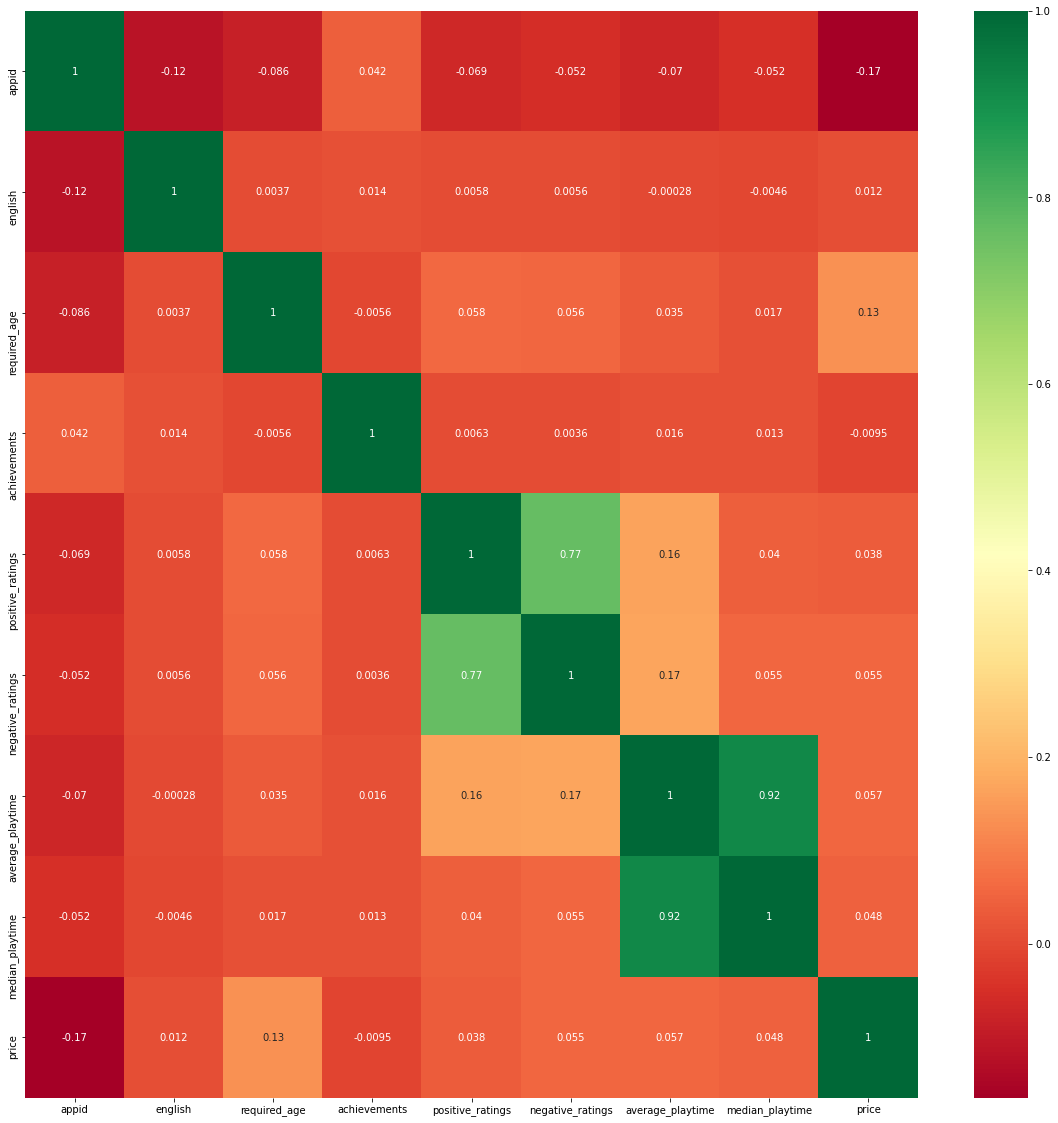

In [33]:
plt.figure(figsize=(20,20))
corrmat=df.corr()
top_feat=corrmat.index
g=sns.heatmap(df[top_feat].corr(),annot=True,cmap='RdYlGn')

In [34]:
df.drop(['name','appid','developer','publisher','categories','steamspy_tags','genres','owners','release_date','price'],axis=1,inplace=True)

In [35]:
df

,english,platforms,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime
0,1,windows,0,0,2,2,0,0
1,1,windows,0,0,30,4,0,0
2,1,windows;mac;linux,0,60,271,30,279,279
3,1,windows;linux,0,53,16,0,0,0
4,1,windows;mac;linux,0,24,29,1,0,0
...,...,...,...,...,...,...,...,...
25039,1,windows,0,9,15,0,0,0
25040,1,windows;mac,0,111,42530,4734,9742,463
25041,1,windows,0,0,258,410,142,157
25042,1,windows,0,36,48,8,0,0


In [38]:
platforms=pd.get_dummies(df['platforms'],drop_first=True)
df=pd.concat([df,platforms,y],axis=1)

In [39]:
df

,english,platforms,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,mac,mac;linux,...,windows;linux,windows;mac,windows;mac;linux,mac,mac;linux,windows,windows;linux,windows;mac,windows;mac;linux,price
0,1,windows,0,0,2,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
1,1,windows,0,0,30,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
2,1,windows;mac;linux,0,60,271,30,279,279,0,0,...,0,0,1,0,0,0,0,0,1,10
3,1,windows;linux,0,53,16,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,5
4,1,windows;mac;linux,0,24,29,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25039,1,windows,0,9,15,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
25040,1,windows;mac,0,111,42530,4734,9742,463,0,0,...,0,1,0,0,0,0,0,1,0,0
25041,1,windows,0,0,258,410,142,157,0,0,...,0,0,0,0,0,1,0,0,0,4
25042,1,windows,0,36,48,8,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4


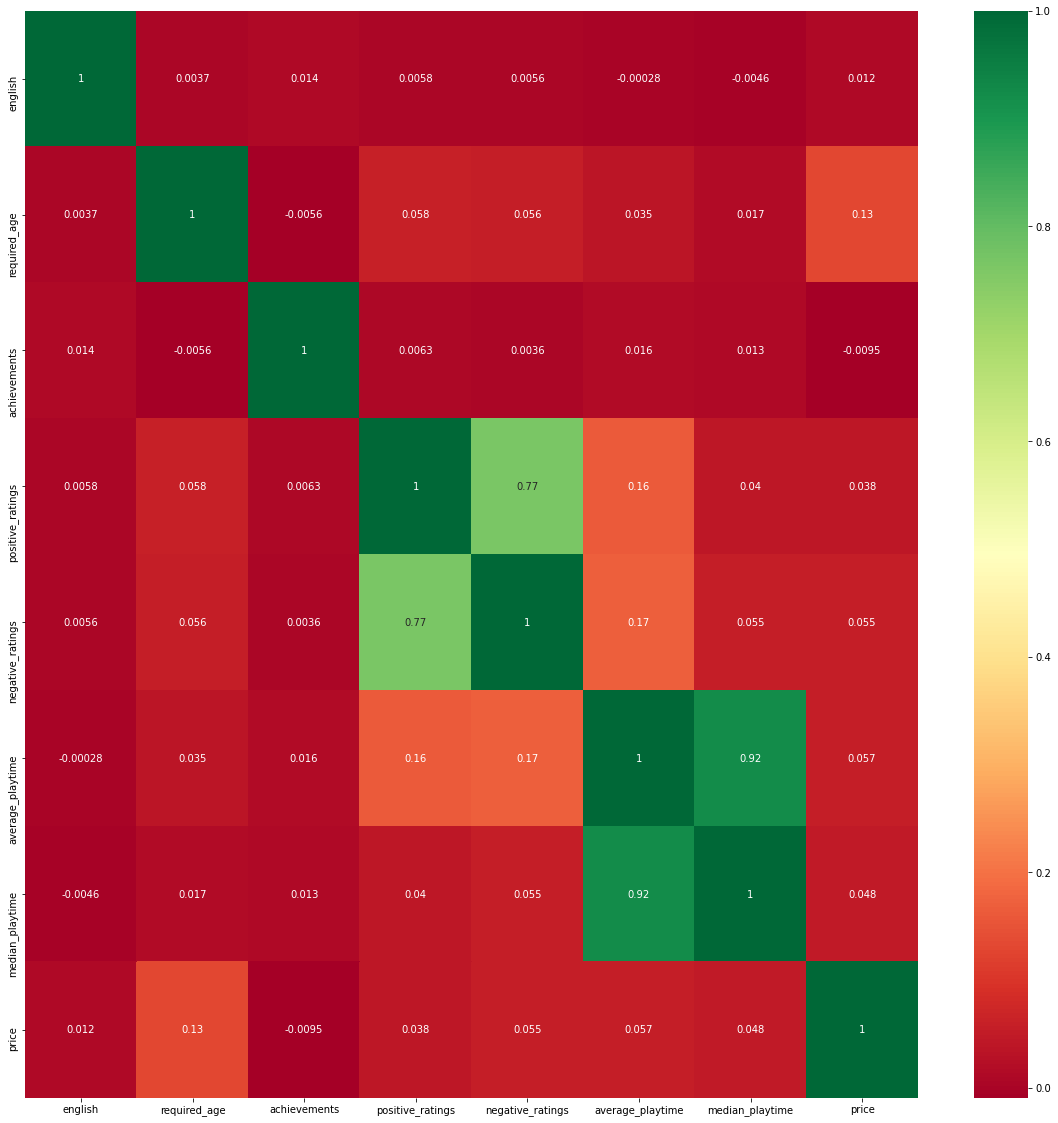

In [13]:
plt.figure(figsize=(20,20))
corrmat=df.corr()
top_feat=corrmat.index
g=sns.heatmap(df[top_feat].corr(),annot=True,cmap='RdYlGn')

In [14]:
for i in df.columns:
    df[i] = df[i].astype(int)
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

ValueError: invalid literal for int() with base 10: 'windows'

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ValueError: could not convert string to float: 'The Armament Project'

In [ ]:
x.shape

In [ ]:
df['price']=df['price'].astype(int)

In [ ]:
df